In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')


In [2]:
def compare_timeseries(x1,y1,name1,x2,y2,name2):
    '''
    x1,y1: time series 1
    x2,y2: time series 2
    '''
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(name1, color=color) #First X-Axis label
    ax1.plot(x1, y1, color=color) #First time series
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.set_ylabel(name2, color=color) #Second X-axis label
    ax2.plot(x2, y2, color=color)  #Second time series
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    plt.show()

In [3]:
def plot_timeseries(x,y,graph_name,axv_value,axv_name):
    '''
    x,y: time series
    graph_name: title of graph
    axv_value: string date value of verticle line to plot
    axv_name: label of vertical line
    '''
    
    fig, ax = plt.subplots()

    color = 'tab:red'
    ax.set_xlabel('Date')
    ax.set_ylabel(graph_name, color=color) #X-Axis label
    ax.plot(x, y, color=color) #time series
    ax.tick_params(axis='y', labelcolor=color)
    ax.axvline(pd.to_datetime(axv_value), color = 'black', label = axv_name) #Line
    fig.tight_layout()
    plt.show()

### 1. Read Merged dataset

In [4]:
df = pd.read_csv('../datasets/merged_df2.csv')
df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d')
df.set_index('time',inplace=True)
df.head()


,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends
time,,,,,,,,,,,,
2018-04-08,38,0.000,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20
2018-04-15,56,0.000,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18
2018-04-22,55,0.000,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21
2018-04-29,74,0.000,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23
2018-05-06,62,0.029,0.549,0.382,0.039,28.785714,8.328571,3.742857,34.2,44.6,23.6,39


### 2. Comparing Dengue cases with Google Trends From 2018-2023

* The 2 spikes are significantly higher than spike in 2019 after circuit breaker in 2020 April

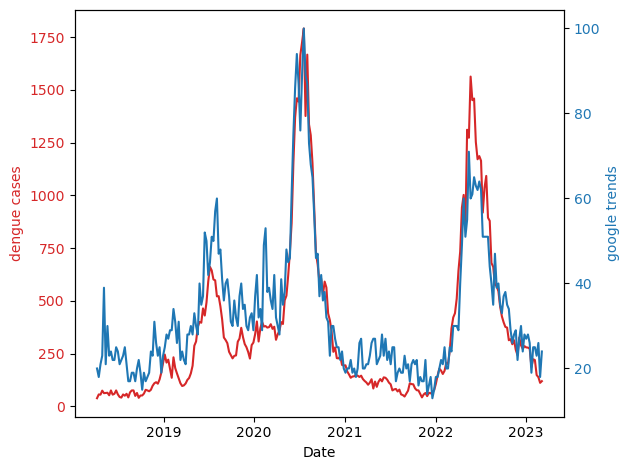

In [5]:
x=df.index
y1=df.dengue_cases
y2=df.google_trends

compare_timeseries(x,y1,'dengue cases',x,y2,'google trends')

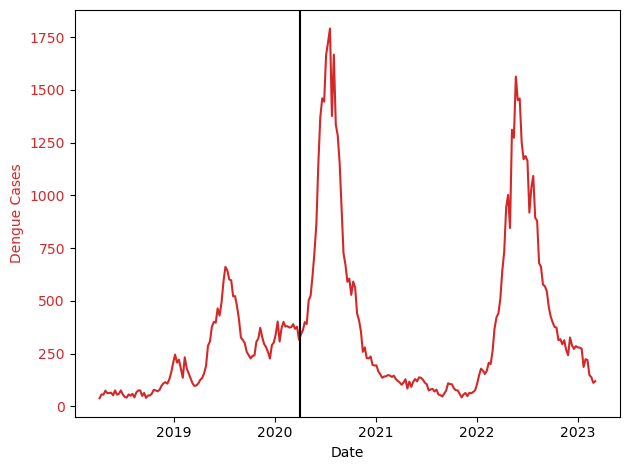

In [6]:
plot_timeseries(df.index,df.dengue_cases,'Dengue Cases','2020-04-03','Circuit Breaker')

### 3. Plot dengue time series 2012-2023
* From the above plot, the dengue cases spikes during the circuit breaker period, it might be influenced by many people staying indoors.
* Use data from original degnue cases dataset to see the pattern before 2018

In [7]:
df2 = pd.read_csv('../datasets/dengue_merged_2012_2023.csv')
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')
df2.dropna(inplace=True)
df2 = df2.astype({"dengue_cases": int})
df2.set_index(['date'],inplace=True)
df2.head()

,dengue_cases
date,
2012-01-01,74
2012-01-08,64
2012-01-15,60
2012-01-22,50
2012-01-29,84


In [8]:
df2.isna().sum()

dengue_cases    0
dtype: int64

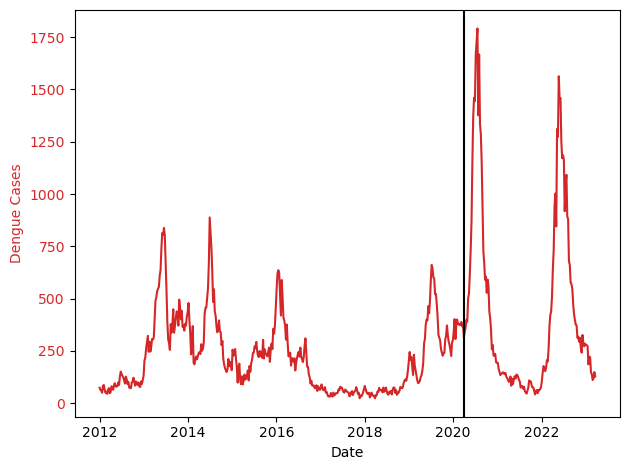

In [9]:
plot_timeseries(df2.index,df2.dengue_cases,'Dengue Cases','2020-04-03','Circuit Breaker')

### 4. Decomposing the trend of dengue cases
* Seasonal pattern: Usually peaks in July 
* Abnormally high in 2020 and 2022 July
* No peaks in 2021 July

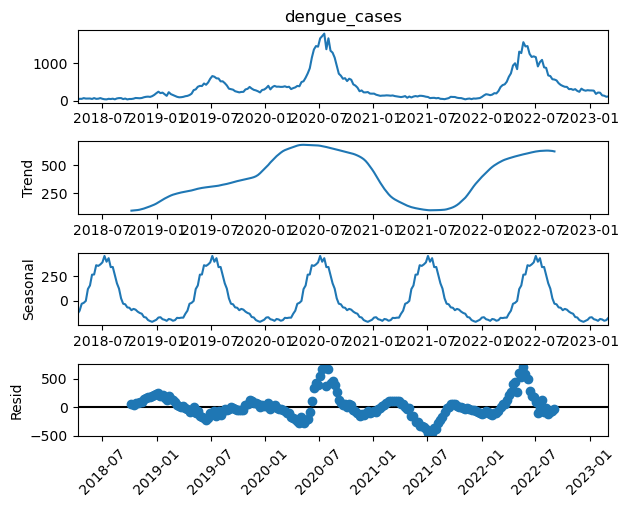

In [10]:
# 2018-2023
result = seasonal_decompose(df.dengue_cases, model='additive')
result.plot()
plt.xticks(rotation=45)
plt.show()

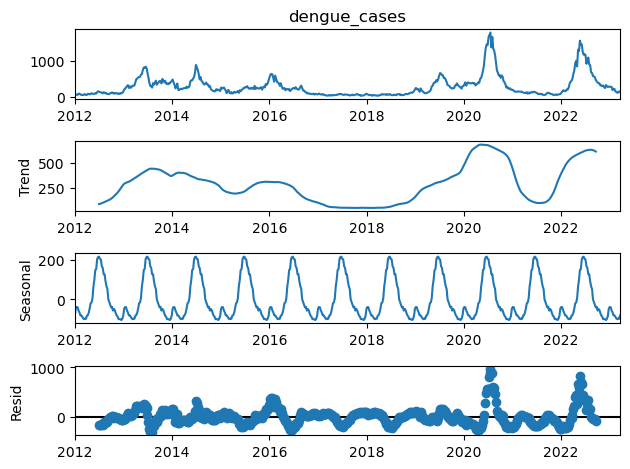

In [11]:
# 2012-2023
result = seasonal_decompose(df2.dengue_cases, model='additive')
result.plot()
plt.show()

### 5. Decomposing Google Trends


#### 5.1 Google trend from 2018-2023

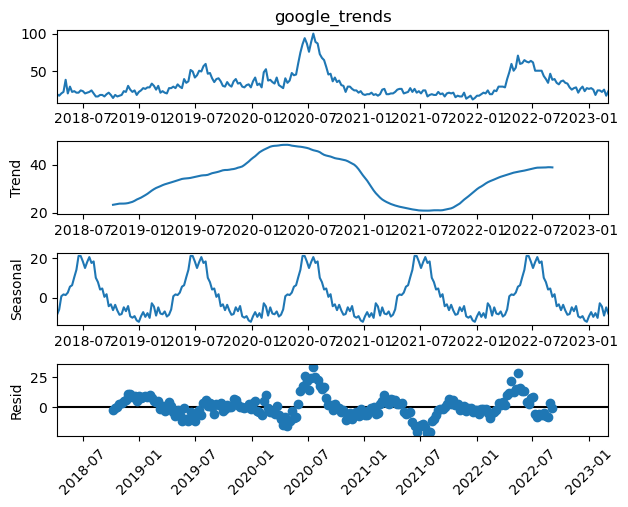

In [12]:
result = seasonal_decompose(df.google_trends, model='additive')
result.plot()
plt.xticks(rotation=45)
plt.show()

#### 5.2 Google trend from 2012-2023
* Using the extended data for monthy google trends from 2012 to 2023, we can see a similar trend with dengue cases
* There is a spike in July 2016 for google searches without a corresponding significant increase in dengue cases

In [13]:
ts = pd.read_csv('../datasets/dengue_search_trends/defined_queries_2012_2023.csv', skiprows=2)
ts['Month'] = pd.to_datetime(ts['Month'], format = '%Y-%m-%d')
ts.set_index('Month',inplace=True)
ts.rename(columns={ ts.columns[0]: "google_trend" }, inplace = True)
ts.head()

,google_trend
Month,
2012-01-01,16
2012-02-01,17
2012-03-01,15
2012-04-01,18
2012-05-01,17


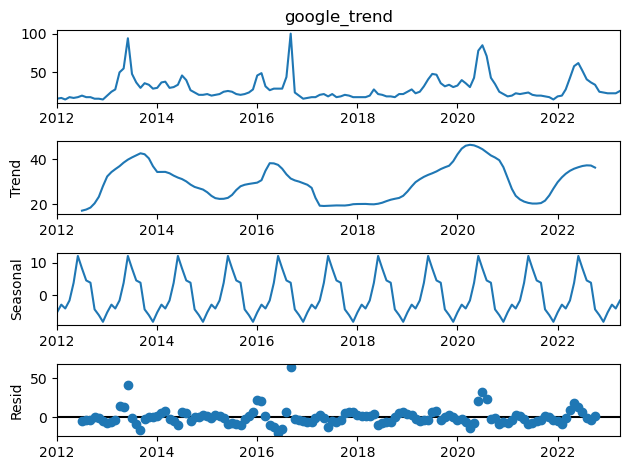

In [14]:
result = seasonal_decompose(ts.google_trend, model='additive')
result.plot()
plt.show()